## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
# Import Packages
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing as LE

In [2]:
irisdata_df = pd.read_csv("Iris.csv")

In [3]:
stu_df=pd.read_csv("students-data.csv")

In [4]:
stu_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [5]:
stu_df["number"]= stu_df.index
stu_df.set_index("number" , inplace=True)
stu_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
stu_df[stu_df == np.nan].count()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [7]:
stu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [8]:
stu_df.select_dtypes(include = "object" )
print (stu_df.select_dtypes(include = "object"))

       school sex address famsize Pstatus      Mjob      Fjob      reason  \
number                                                                      
0          GP   F       U     GT3       A   at_home   teacher      course   
1          GP   F       U     GT3       T   at_home     other      course   
2          GP   F       U     LE3       T   at_home     other       other   
3          GP   F       U     GT3       T    health  services        home   
4          GP   F       U     GT3       T     other     other        home   
5          GP   M       U     LE3       T  services     other  reputation   
6          GP   M       U     LE3       T     other     other        home   
7          GP   F       U     GT3       A     other   teacher        home   
8          GP   M       U     LE3       A  services     other        home   
9          GP   M       U     GT3       T     other     other        home   
10         GP   F       U     GT3       T   teacher    health  reputation   

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [9]:
stu_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [10]:
Del_Var_Col = ['traveltime','studytime', 'failures','famrel','freetime','Dalc']
Stu_Var= stu_df.drop(Del_Var_Col, axis=1)
Stu_Var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 no

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [11]:
from sklearn import preprocessing


In [12]:
LE = preprocessing.LabelEncoder()
Student_Var = Stu_Var.apply(LE.fit_transform)

In [13]:
Student_Var .head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,1,0,0,3,0,2,6,2,3,3
1,0,0,2,1,0,1,1,1,0,2,...,1,1,0,2,0,2,4,2,2,3
2,0,0,0,1,1,1,1,1,0,2,...,1,1,0,1,2,2,10,4,5,7
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,0,4,2,12,11,12
4,0,0,1,1,0,1,3,3,2,2,...,1,0,0,1,1,4,4,3,7,7


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [14]:
Grades_df = Student_Var[['G1','G2','G3']]
Grades_df.head()

,G1,G2,G3
number,,,
0,2,3,3
1,2,2,3
2,4,5,7
3,12,11,12
4,3,7,7


In [15]:
pd.DataFrame(np.where(Grades_df >= 10,1, 0), columns=Grades_df.columns).head()

,G1,G2,G3
0,0,0,0
1,0,0,0
2,0,0,0
3,1,1,1
4,0,0,0


In [16]:
Grades_df = Student_Var[['G3']]
Grades_df = pd.DataFrame(np.where(Grades_df >= 10,1, 0), columns=Grades_df.columns)
Grades_df.head()

,G3
0,0
1,0
2,0
3,1
4,0


In [17]:
Student_Var[['G3']] = Grades_df

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [18]:
Student_Var.values

array([[0, 0, 3, ..., 2, 3, 0],
       [0, 0, 2, ..., 2, 2, 0],
       [0, 0, 0, ..., 4, 5, 0],
       ...,
       [1, 1, 6, ..., 7, 5, 0],
       [1, 1, 3, ..., 8, 9, 0],
       [1, 1, 4, ..., 5, 6, 0]], dtype=int64)

In [19]:
Student_Var.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,1,0,0,3,0,2,6,2,3,0
1,0,0,2,1,0,1,1,1,0,2,...,1,1,0,2,0,2,4,2,2,0
2,0,0,0,1,1,1,1,1,0,2,...,1,1,0,1,2,2,10,4,5,0
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,0,4,2,12,11,1
4,0,0,1,1,0,1,3,3,2,2,...,1,0,0,1,1,4,4,3,7,0


In [58]:
array = Student_Var.values
X = array[:,0:26]
Y = array[:,26:]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

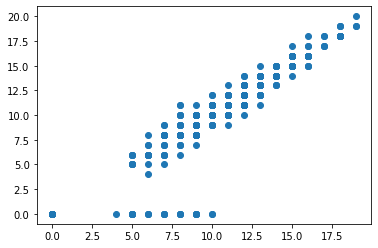

In [59]:
plt.scatter (stu_df['G2'],stu_df['G3'])

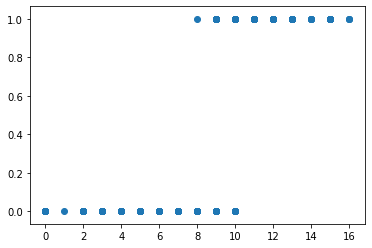

In [60]:
plt.scatter (Student_Var['G2'],Student_Var['G3'])


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [61]:
stu_df['school'].unique ()

array(['GP', 'MS'], dtype=object)

In [62]:
stu_df['age'].unique ()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

Text(0, 0.5, 'count')

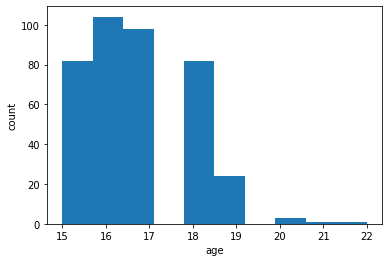

In [63]:
plt.hist (stu_df['age'])
plt.xlabel("age")
plt.ylabel("count")

In [64]:
stu_df.groupby(['school']).size() ## for knowing the count of students in each school 

school
GP    349
MS     46
dtype: int64

([<matplotlib.axis.XTick at 0x1ab472382b0>,
 <a list of 2 Text xticklabel objects>)

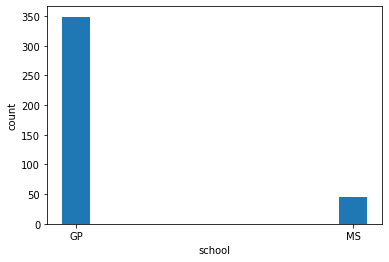

In [65]:
x = np.arange(stu_df['school'].nunique())
width=0.1
plt.bar(x,[349,46],width=width)
plt.xlabel("school")
plt.ylabel("count")
plt.xticks(x,['GP','MS'])

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [66]:
array = Student_Var.values
X = array[:,0:26]
Y = array[:,26:]
test_size = 0.24 # taking 76:24 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)
X

array([[ 0,  0,  3, ...,  6,  2,  3],
       [ 0,  0,  2, ...,  4,  2,  2],
       [ 0,  0,  0, ..., 10,  4,  5],
       ...,
       [ 1,  1,  6, ...,  3,  7,  5],
       [ 1,  1,  3, ...,  0,  8,  9],
       [ 1,  1,  4, ...,  5,  5,  6]], dtype=int64)

In [67]:
X_train.shape

(300, 26)

In [68]:
print ('Train records are:', 300)
print ('Test records are :', 27)

Train records are: 300
Test records are : 27


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score 

In [73]:
X_train.shape

(300, 26)

In [74]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
model_score_f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print('model_score: {}'.format(model_score))
print('f1 score : {}'.format(model_score_f1))
print('accuracy : {}'.format(accuracy))

model_score: 0.8947368421052632
f1 score : 0.8809523809523809
accuracy : 0.8947368421052632


C:\Users\Eesha Kartik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eesha Kartik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# ----Iteration 2 -----

In [75]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [77]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
model_score_f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print('model_score: {}'.format(model_score))
print('f1 score : {}'.format(model_score_f1))
print('accuracy : {}'.format(accuracy))

model_score: 0.9052631578947369
f1 score : 0.8695652173913044
accuracy : 0.9052631578947369


C:\Users\Eesha Kartik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eesha Kartik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Naive bayes with Iris data

### Import Iris.csv

In [82]:
irisdata_df = pd.read_csv("Iris.csv")

In [88]:
irisdata_df.shape

(150, 5)

In [85]:
irisdata_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [93]:
irisdata_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [111]:
irisdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [94]:
X= irisdata_df.iloc[ : , :4].values
Y= irisdata_df.iloc[ : , 4:].values

In [144]:
array = irisdata_df.values
X = array[:,0:4]
Y = array[:,4:]

### Find the distribution of target variable (Class)

In [145]:
irisdata_df["Class"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Class, dtype: int64

### Plot the distribution of target variable using histogram

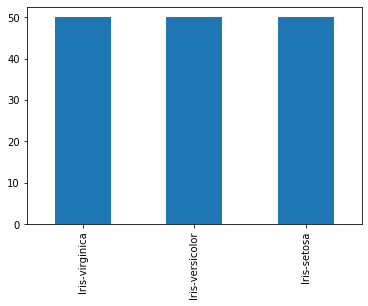

In [146]:
pd.value_counts(irisdata_df["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

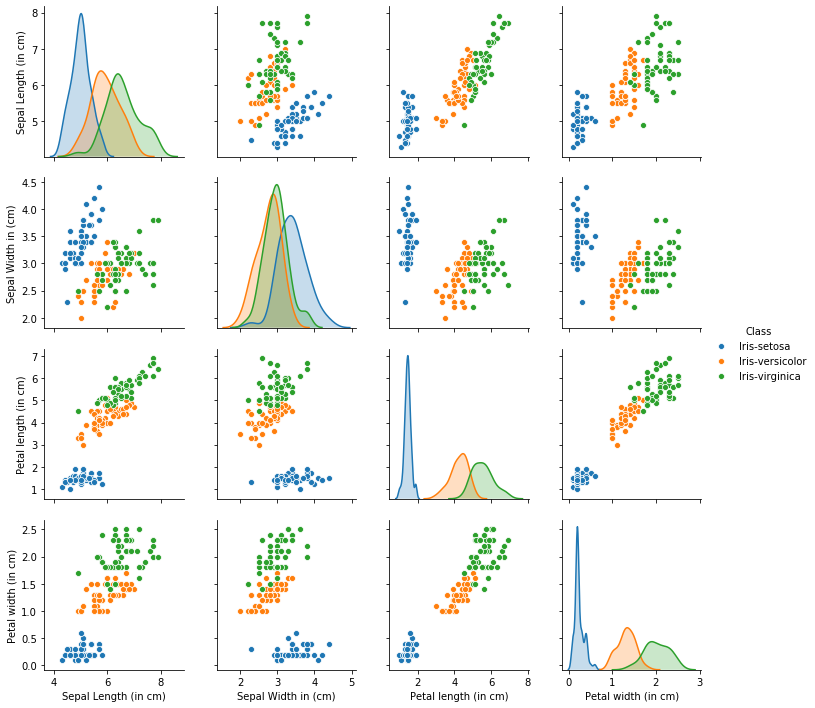

In [147]:
sns.pairplot(irisdata_df,hue='Class')

### Summary Statistics and explain insights for at least 2 variables

In [148]:
irisdata_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [149]:
## all variables have 150 observations.the edian & mean values are associated closely. There are no outlier values in of the variables.
## Sepal Length - min sepal length is 4.3 cm and max sepal length is 7.9 cm with 75 observations at 5.80 cm. Data is normally distributed
## Petal Width - data is skewed as the difference between 1st quartile and median is larger relative to median and 2nd quartile 

### Correlation among all variables and give your insights

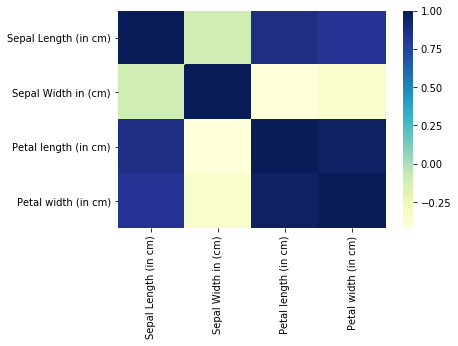

In [150]:
sns.heatmap(irisdata_df.corr(),cmap="YlGnBu")

In [151]:
## Sepal Length and Petal width have a very strong correlation
## Petal Lenght and Petal width have a strong correlation 
## in the above observation there is a strong probability that Sepal Length & Petal Length will change if Petal width changes
## surprisingly the sepal width has a low correlation with the Petal Length or Petal Width 

### Split data in Training and Validation in 80:20

In [152]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [153]:
array = irisdata_df.values
X = array[:,0:4]
Y = array[:,4:]
# Create the training and test data set in the ratio of 80:20 respectively.

test_size = 0.20 # taking 80:20 training and test set
seed = 5  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

### Do Feature Scaling

In [ ]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [158]:
poly = PolynomialFeatures( degree = 2, include_bias = False) 
XPoly_train = poly.fit_transform(X_train)
# new Quadratic feature 
XPoly_train[0:2]

array([[ 5.1 ,  3.4 ,  1.5 ,  0.2 , 26.01, 17.34,  7.65,  1.02, 11.56,
         5.1 ,  0.68,  2.25,  0.3 ,  0.04],
       [ 5.5 ,  2.3 ,  4.  ,  1.3 , 30.25, 12.65, 22.  ,  7.15,  5.29,
         9.2 ,  2.99, 16.  ,  5.2 ,  1.69]])

In [159]:
poly = PolynomialFeatures( degree = 3, include_bias = False) 
XPoly_train = poly.fit_transform(X_train)
# new Quadratic feature 
XPoly_train[0:2]

array([[5.10000e+00, 3.40000e+00, 1.50000e+00, 2.00000e-01, 2.60100e+01,
        1.73400e+01, 7.65000e+00, 1.02000e+00, 1.15600e+01, 5.10000e+00,
        6.80000e-01, 2.25000e+00, 3.00000e-01, 4.00000e-02, 1.32651e+02,
        8.84340e+01, 3.90150e+01, 5.20200e+00, 5.89560e+01, 2.60100e+01,
        3.46800e+00, 1.14750e+01, 1.53000e+00, 2.04000e-01, 3.93040e+01,
        1.73400e+01, 2.31200e+00, 7.65000e+00, 1.02000e+00, 1.36000e-01,
        3.37500e+00, 4.50000e-01, 6.00000e-02, 8.00000e-03],
       [5.50000e+00, 2.30000e+00, 4.00000e+00, 1.30000e+00, 3.02500e+01,
        1.26500e+01, 2.20000e+01, 7.15000e+00, 5.29000e+00, 9.20000e+00,
        2.99000e+00, 1.60000e+01, 5.20000e+00, 1.69000e+00, 1.66375e+02,
        6.95750e+01, 1.21000e+02, 3.93250e+01, 2.90950e+01, 5.06000e+01,
        1.64450e+01, 8.80000e+01, 2.86000e+01, 9.29500e+00, 1.21670e+01,
        2.11600e+01, 6.87700e+00, 3.68000e+01, 1.19600e+01, 3.88700e+00,
        6.40000e+01, 2.08000e+01, 6.76000e+00, 2.19700e+00]])

In [160]:
poly = PolynomialFeatures( degree = 5, include_bias = False) 
XPoly_train = poly.fit_transform(X_train)
# new Quadratic feature 
XPoly_train[0:2]

array([[5.10000000e+00, 3.40000000e+00, 1.50000000e+00, 2.00000000e-01,
        2.60100000e+01, 1.73400000e+01, 7.65000000e+00, 1.02000000e+00,
        1.15600000e+01, 5.10000000e+00, 6.80000000e-01, 2.25000000e+00,
        3.00000000e-01, 4.00000000e-02, 1.32651000e+02, 8.84340000e+01,
        3.90150000e+01, 5.20200000e+00, 5.89560000e+01, 2.60100000e+01,
        3.46800000e+00, 1.14750000e+01, 1.53000000e+00, 2.04000000e-01,
        3.93040000e+01, 1.73400000e+01, 2.31200000e+00, 7.65000000e+00,
        1.02000000e+00, 1.36000000e-01, 3.37500000e+00, 4.50000000e-01,
        6.00000000e-02, 8.00000000e-03, 6.76520100e+02, 4.51013400e+02,
        1.98976500e+02, 2.65302000e+01, 3.00675600e+02, 1.32651000e+02,
        1.76868000e+01, 5.85225000e+01, 7.80300000e+00, 1.04040000e+00,
        2.00450400e+02, 8.84340000e+01, 1.17912000e+01, 3.90150000e+01,
        5.20200000e+00, 6.93600000e-01, 1.72125000e+01, 2.29500000e+00,
        3.06000000e-01, 4.08000000e-02, 1.33633600e+02, 5.895600

### Train and Fit NaiveBayes Model

In [128]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

C:\Users\Eesha Kartik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [129]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]


In [ ]:
##accuracy is 90%
##-------------------------analysis of the confusion matrix--------------
## In the confusion matrix the rows represent the targets (or real values) and the columns the corresponding outputs (or predictive values). 
## The diagonal cells show the cases that are correctly classified, and the off-diagonal cells show the misclassified cases.
## True Positives (TP): we correctly predicted that 8 were classified correctly as Iris-setosa, 
## True Positives (TP): we correctly predicted that 10 were correctly classified as Iris-versicolor  
## True Positives (TP): we correctly predicted that 9 were correctly classified as Iris-virginica 
## False Positives (FP): we incorrectly predicted that 1 out of 11 was Iris-versicolor (a "Type I error")
## False Negative (FN): we incorrectly predicted that 2 out of 11 were Iris-virginica (a "Type II error")
